**<h2>Mask R-CNN</h2>**

**Imports**

In [1]:
import os
import sys
import random
import cv2
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

c:\Users\matth\anaconda3\envs\coco\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\matth\anaconda3\envs\coco\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\matth\anaconda3\envs\coco\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\matth\anaconda3\envs\coco\lib\site-packages\tensorflow\python\frame

**Config**

In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

**Create Model**

In [3]:
import tensorflow as tf
import keras
import h5py
print(tf.__version__)
print(keras.__version__)
print(h5py.__version__)

1.3.0
2.0.8
2.10.0


In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

**Class Names**

In [5]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

**Object Detection**

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


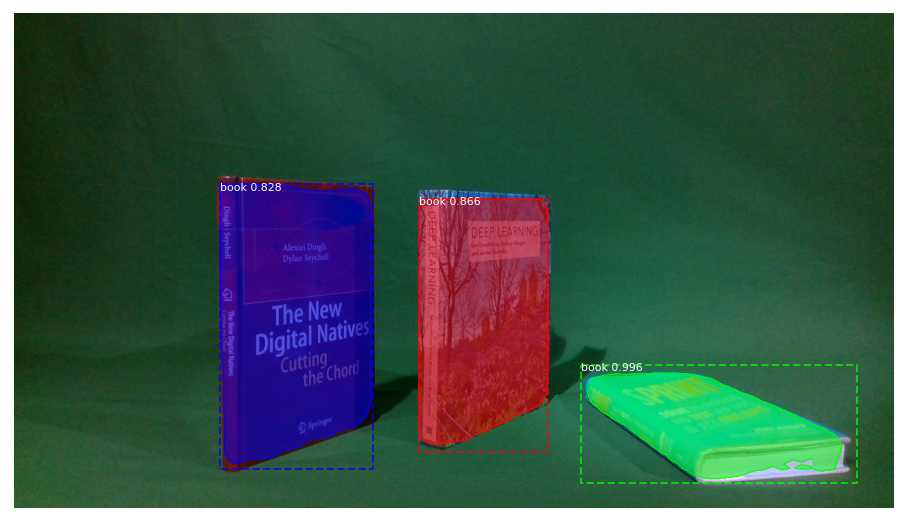

In [6]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

**Display Masks**

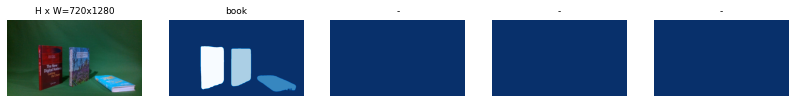

In [7]:
visualize.display_top_masks(image, r['masks'], r['class_ids'], 
                            class_names)

In [8]:
masks = {}

for i in range(len(results[0]['class_ids'])):
    masks[i] = {}
    masks[i]['mask'] = np.array(results[0]['masks'][:, :, i], dtype=np.uint8) * 255

In [9]:
masks

{0: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 1: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 2: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}}

In [10]:
all_masks = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

for i in range(len(results[0]['class_ids'])):
    all_masks += masks[i]['mask']

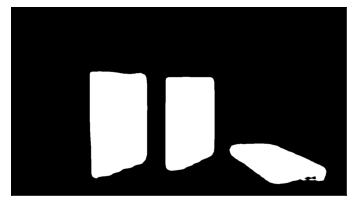

In [11]:
plt.imshow(all_masks, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

**<h2>SaRa</h2>**

In [12]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import saraRC1 as sara

In [13]:
seg_dim = 8

In [14]:
def plot_heatmap(im, grid_size, name=None):
    '''
    Given an image im, this function plots the heatmap generated by SaRa for the given grid size.
    '''

    heatmap, _ = sara.return_sara(im.copy(), grid_size)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    plt.figure(name + ' SaRa Output - Grid Size ' +
               str(grid_size) + ' x ' + str(grid_size))
    plt.gcf().set_size_inches(12, 6)
    plt.imshow(heatmap)
    plt.xticks([])
    plt.yticks([])
    plt.title('SaRa Output - Grid Size ' +
              str(grid_size) + ' x ' + str(grid_size))

In [15]:
s1 = cv2.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
heatmap, sara_list = sara.return_sara(s1.copy(), 8)

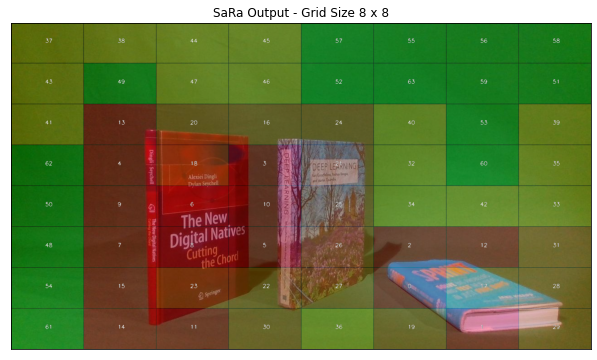

In [16]:
plot_heatmap(s1, seg_dim, 'Original')

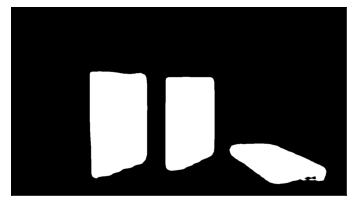

In [17]:
plt.imshow(all_masks, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

**Mask Ranking**

In [18]:
T = 0.6

In [19]:
def index_to_coordinates(index, grid_size, im_size):
    '''
    Given an index and a shape, this function returns the corresponding coordinates.
    '''

    x1 = int((index % grid_size) * (im_size[1] / grid_size))
    y1 = int((index // grid_size) * (im_size[0] / grid_size))

    x2 = int(x1 + (im_size[1] / grid_size))
    y2 = int(y1 + (im_size[0] / grid_size))
    
    return (x1, y1, x2, y2)

In [24]:
sara_list

[(13, 144.0860430870897, 142.32818480383452, 0.7578582832551991, 1, 63, 4),
 (24, 232.39210521717376, 230.76793994272296, 0.6241652744508059, 1, 62, 4),
 (56, 369.5462237317091, 368.0462237317091, 0.5, 1, 61, 4),
 (30, 395.1698531214566, 393.29930255816043, 0.8705505632961241, 1, 60, 4),
 (14, 515.1206543276816, 513.4232824945063, 0.6973718331752027, 1, 59, 4),
 (7, 852.0885041758929, 850.5885041758929, 0.5, 1, 58, 4),
 (4, 1006.7734559375618, 1005.1317429887804, 0.6417129487814521, 1, 57, 4),
 (6, 1344.843657725912, 1343.2693085484134, 0.5743491774985175, 1, 56, 4),
 (5, 2876.5210884921275, 2874.896923217677, 0.6241652744508059, 1, 55, 4),
 (48, 5736.712640730646, 5735.138291553148, 0.5743491774985175, 1, 54, 4),
 (22, 6197.680216406291, 6195.879146528701, 0.8010698775896221, 1, 53, 4),
 (12, 6425.337643701319, 6423.558479121659, 0.7791645796604999, 1, 52, 4),
 (15, 9090.114642732367, 9088.50754529017, 0.6070974421975235, 1, 51, 4),
 (32, 9868.48086686015, 9866.839153911369, 0.6417129

In [142]:
# For each segment, check which mask falls under that segment using MRn = rank(Gi); (Gi interesect Mn) > T
def mask_to_segments(s1, masks, seg_dim, T):
    sara.reset()
    _, sara_list = sara.return_sara(s1.copy(), seg_dim)

    mask_segments = {}

    for segment in sara_list:
        # Convert index to coordinates, extract segment from heatmap
        x1, y1, x2, y2 = index_to_coordinates(segment[5], seg_dim, s1.shape)

        for m in masks:
            if m not in mask_segments:
                mask_segments[m] = []

            # Extract mask from masks
            mask = masks[m]['mask'][y1:y2, x1:x2]

            # Calculate intersection over union
            intersection = np.sum(mask > 0)
            union = np.sum(mask > 0) + np.sum(mask == 0)

            iou = intersection / union

            # print('Segment: ', segment[5], 'Mask: ', m, 'IoU: ', iou)

            if iou > T:
                # index, rank
                mask_segments[m].append((segment[5], segment[0]))

    return mask_segments, len(sara_list)

**Grid-Size Experiment**

In [177]:
def grid_size(s1, masks, max_dim=20, T=0.1):
    mask_cover = {}

    for seg_dim in range(2, max_dim + 1):
        mask_segments, seg_qty = mask_to_segments(s1, masks, seg_dim, T)
        color_idx = 0  # Index to select colors from the colormap
        for mask in mask_segments:
            if mask not in mask_cover:
                mask_cover[mask] = {}

            # mask_cover[mask][seg_dim] = len(mask_segments[mask])
            mask_cover[mask][seg_dim] = len(mask_segments[mask]) / seg_qty

    # print(mask_cover)
    # colors = plt.cm.tab20(np.linspace(0, 1, 20))

    # plt.rcParams['figure.figsize'] = (20, 10)
    # plt.figure()

    # plt.xlabel('Segment Dimension', fontsize=15)
    # plt.ylabel('Object Size in Image', fontsize=15)
    # plt.title('Object Size in Image vs. Segment Dimension', fontsize=15)


    # handles = []
    # labels = []

    # color_idx = 0  # Initialize color index

    for mask in mask_cover:
        # color = colors[color_idx]
        # color_idx = (color_idx + 1) % len(colors)

        # random colour
        color = np.random.rand(3,)

        scatter = plt.scatter(np.arange(2, max_dim + 1), list(mask_cover[mask].values()), color=color, label=f'Mask {mask}')
        line = plt.plot(np.arange(2, max_dim + 1), list(mask_cover[mask].values()), color=color, linestyle='-', linewidth=1, alpha=0.7)

        # handles.append(scatter)
        # labels.append(f'Mask {mask}')

    # plt.legend(handles, labels)  # Add the legend using collected handles and labels

    # Set x-axis ticks to integers
    plt.xticks(np.arange(2, max_dim + 1, 1))

    # plt.show()
    return mask_cover

**<h2>COCO</h2>**

In [126]:
# Import coco
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
import skimage.io as io

ann_file = 'instances_train2017.json'
coco_data = COCO(ann_file)
coco_annotations = coco_data.loadAnns(coco_data.getAnnIds())

loading annotations into memory...
Done (t=37.96s)
creating index...
index created!


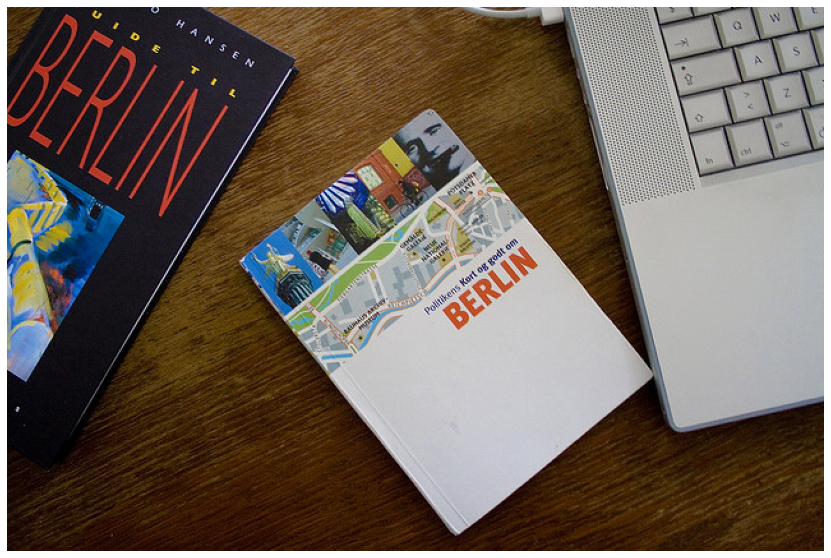

In [128]:
# get all images containing given categories, select one at random
catIds = coco_data.getCatIds(catNms=['laptop', 'book']);
imgIds = coco_data.getImgIds(catIds=catIds);
# imgIds = coco_data.getImgIds(imgIds = [324158])
img = coco_data.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

I = io.imread(img['coco_url'])
plt.axis('off')
plt.rcParams['figure.figsize'] = [40, 20]
plt.imshow(I)
plt.show()

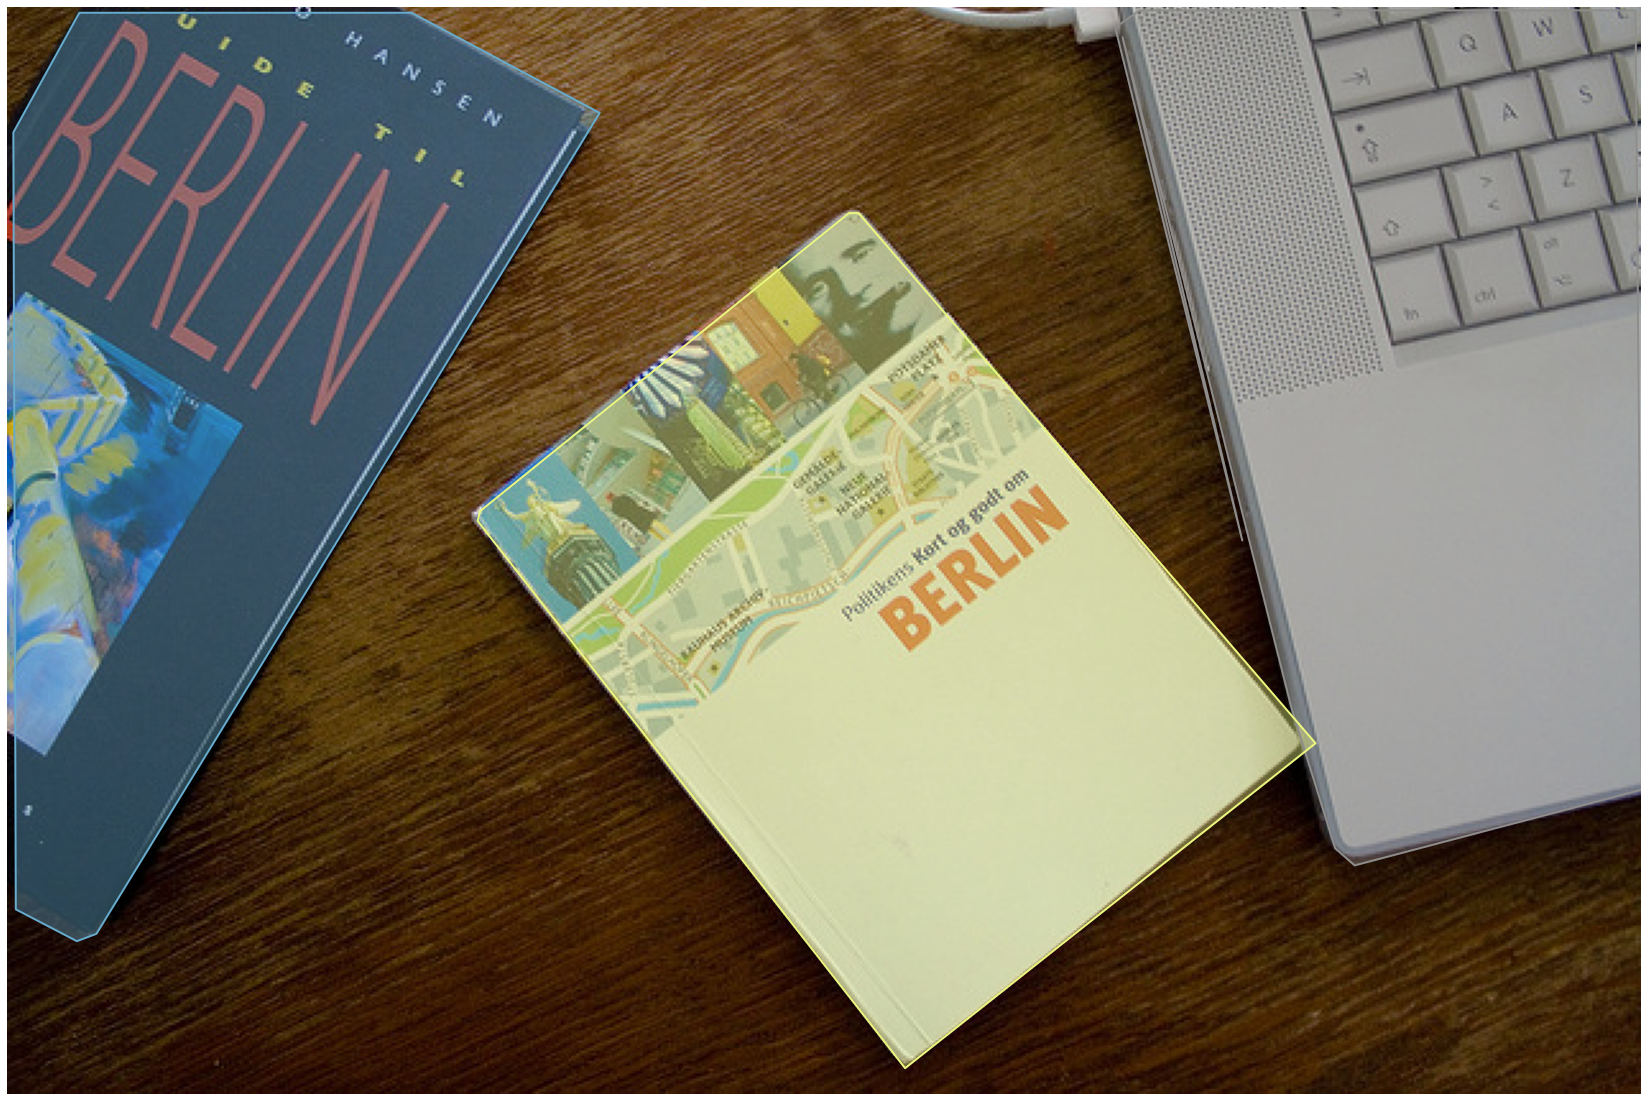

In [129]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco_data.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_data.loadAnns(annIds)
coco_data.showAnns(anns)

In [176]:
def coco_grid_size(img):
    def anns_to_masks(anns):
        masks = {}

        for ann in anns:
            if ann['id'] not in masks:
                masks[ann['id']] = {}

            masks[ann['id']]['mask'] = coco_data.annToMask(ann)

        return masks

    anns = coco_data.loadAnns(coco_data.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None))
    masks = anns_to_masks(anns)
    mask_cover = grid_size(I, masks, 20, 0.1)

    return mask_cover

c:\Users\matth\anaconda3\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


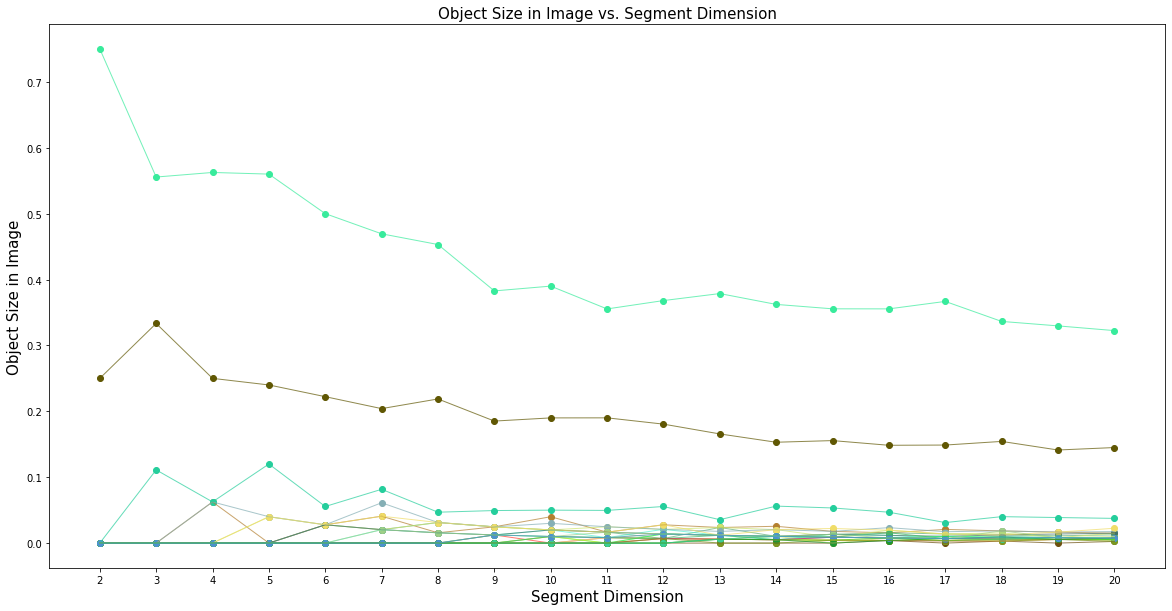

In [178]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.figure()

plt.xlabel('Segment Dimension', fontsize=15)
plt.ylabel('Object Size in Image', fontsize=15)
plt.title('Object Size in Image vs. Segment Dimension', fontsize=15)

imgs = coco_data.loadImgs(imgIds)

mask_cover = []

i = 0
for img in imgs:
    mask_cover.append(coco_grid_size(img))

    i += 1

    if i == 3:
        break

plt.show()

In [191]:
object_sizes = []

for img in mask_cover:
    for mask in img:
        object_sizes.append(list(img[mask].values()))

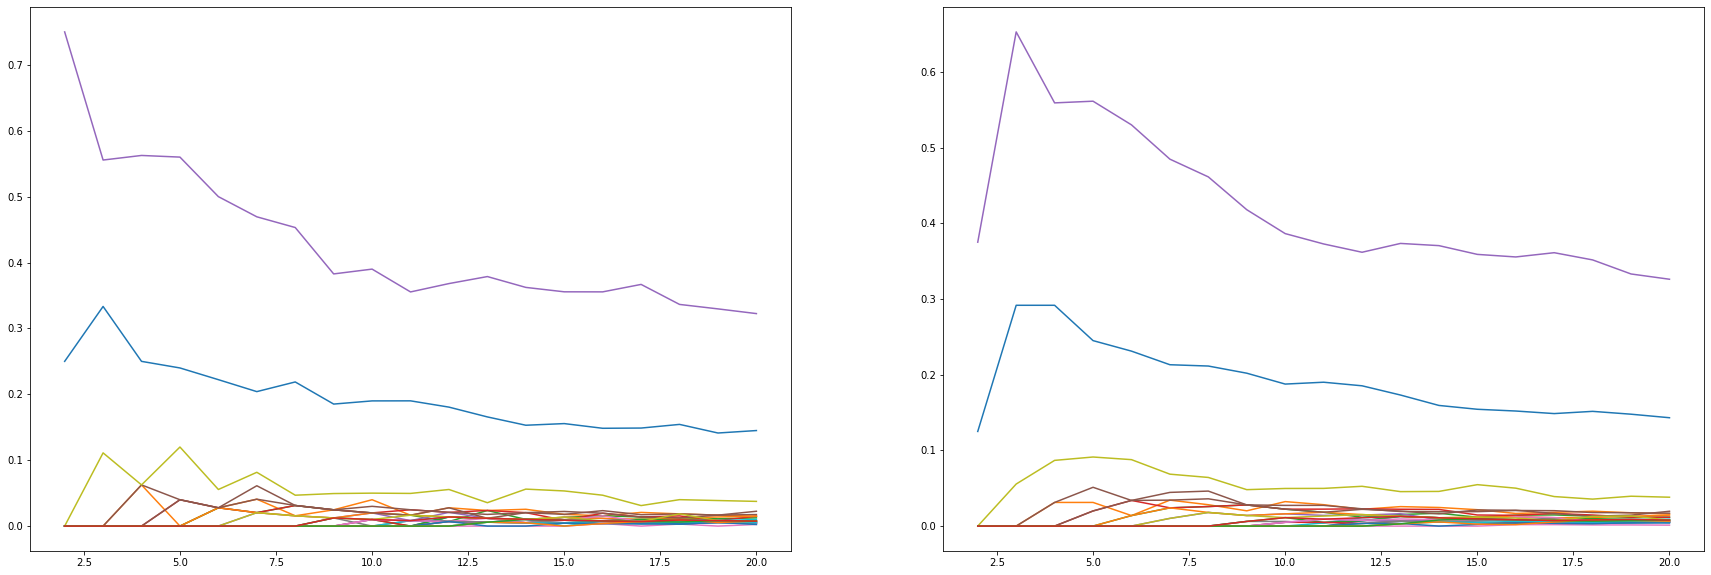

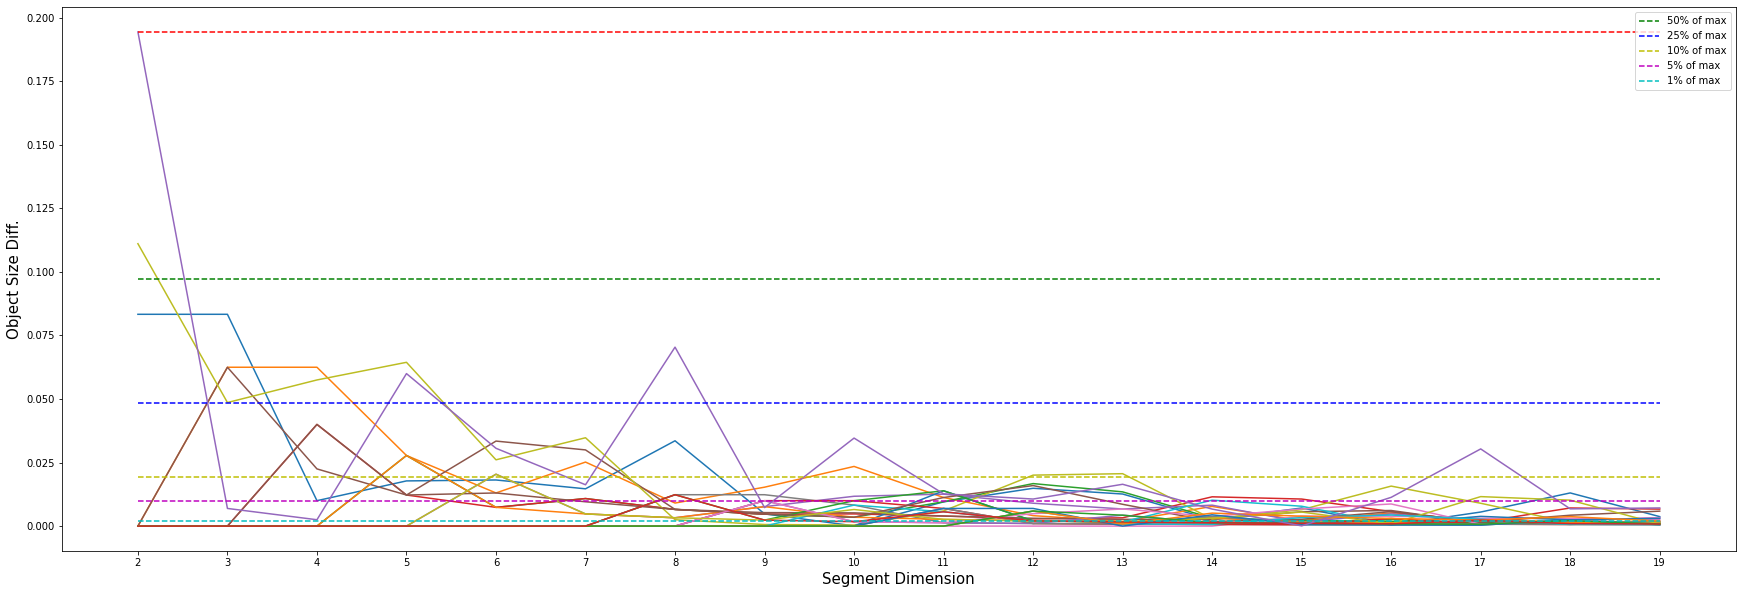

In [333]:
# Moving average
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

# Plot moving average
plt.rcParams['figure.figsize'] = (30, 10)
plt.figure()

plt.xlabel('Segment Dimension', fontsize=15)
plt.ylabel('Object Size in Image', fontsize=15)

w = 2

s1 = plt.subplot(121)
s2 = plt.subplot(122)

for i in range(len(object_sizes)):
    s1.plot(np.arange(2, 21), object_sizes[i], label=f'Image {i}')
    s2.plot(np.arange(2, 21), moving_average(object_sizes[i], w), label=f'Image {i}')

# Plot moving average
plt.rcParams['figure.figsize'] = (30, 10)
plt.figure()

plt.xlabel('Segment Dimension', fontsize=15)
plt.ylabel('Object Size Diff.', fontsize=15)

plt.xticks(np.arange(2, 20, 1))

# s2 = plt.subplot(122)

# Plot the difference in value between each point and the one before it
for i in range(len(object_sizes)):
    plt.plot(np.arange(2, 20), np.abs(np.diff(object_sizes[i])))
    # s2.plot(np.arange(2, 20), moving_average(np.abs(np.diff(object_sizes[i])), w))

# Plot horizontal line at the max y value of the moving average
maxs1 = max([max(np.abs(np.diff(object_sizes[i]))) for i in range(len(object_sizes))])
plt.plot(np.arange(2, 20), [maxs1] * 18, 'r--')

# Plot at 50%, 25%, 10%, 5%, and 1% of maxs1
for i, c in zip([0.5, 0.25, 0.1, 0.05, 0.01], ['g', 'b', 'y', 'm', 'c']):
    plt.plot(np.arange(2, 20), [maxs1 * i] * 18, f'{c}--', label=f'{int(i * 100)}% of max')

# maxs2 = max([max(moving_average(np.abs(np.diff(object_sizes[i])), w)) for i in range(len(object_sizes))])
# s2.plot(np.arange(2, 20), [maxs2] * 18, 'r--')

# for i, c in zip([0.5, 0.25, 0.1, 0.05, 0.01], ['g', 'b', 'y', 'm', 'c']):
#     s2.plot(np.arange(2, 20), [maxs2 * i] * 18, f'{c}--')
plt.legend()